In [126]:
import numpy as np
import pandas as pd
import scipy as spy
import matplotlib.pyplot as plt
import time
import random

## Fitness function

In [125]:
def fitness (password, test_word):
    
    if (len(test_word) != len(password)):
        print("taille incompatible")
    else:
        score = 0
        i = 0
        while i < len(password):
            if password[i] == test_word[i]:
                score += 1
            i += 1
        return score * 100 / len(password)

## Generate words and population of words

### Words are individuals and letters are genes

In [133]:
def generateAWord(length):
    i = 0
    result = ""
    while i < length:
        letter = chr(97 + int(26 * random.random())) # a-z randomly distributed
        result += letter
        i +=1
    return result

def generateFirstPopulation(sizePopulation, password):
    population = []
    i = 0
    while i < sizePopulation:
        population.append(generateAWord(len(password)))
        i+=1
    return population

## Select the most fit

In [138]:
import operator
import random

def computePerfPopulation(population, password):
    populationPerf = {}
    for individual in population:
        populationPerf[individual] = fitness(password, individual)
    return sorted(populationPerf.items(), key = operator.itemgetter(1), reverse=True)

def selectFromPopulation(populationSorted, best_sample, lucky_few):
    nextGeneration = []
    for i in range(best_sample):
        nextGeneration.append(populationSorted[i][0])
    for i in range(lucky_few):
        nextGeneration.append(random.choice(populationSorted)[0])
    random.shuffle(nextGeneration)
    return nextGeneration

## Breeding - Generate children

In [139]:
import random

def createChild(individual1, individual2):
    child = ""
    for i in range(len(individual1)):
        if (int(100 * random.random()) < 50):
            child += individual1[i]
        else:
            child += individual2[i]
    return child

def createChildren(breeders, number_of_child):
    nextPopulation = []
    for i in range(len(breeders)//2):
        for j in range(number_of_child):
            nextPopulation.append(createChild(breeders[i], breeders[len(breeders) -1 -i]))
    return nextPopulation

## Mutation

In [147]:
def mutateWord(word):
    index_modification = int(random.random() * len(word))
    if (index_modification == 0):
        word = chr(97 + int(26 * random.random())) + word[1:]
    else:
        word = word[:index_modification] + chr(97 + int(26 * random.random())) + word[index_modification+1:]
    return word

def mutatePopulation(population, chance_of_mutation):
    for i in range(len(population)):
        if random.random() * 100 < chance_of_mutation:
            population[i] = mutateWord(population[i])
    return population

## Create the next generation from the precious

In [99]:
def nextGeneration (firstGeneration, password, best_sample, lucky_few, number_of_child, chance_of_mutation):
    populationSorted = computePerfPopulation(firstGeneration, password)
    nextBreeders = selectFromPopulation(populationSorted, best_sample, lucky_few)
    nextPopulation = createChildren(nextBreeders, number_of_child)
    nextGeneration = mutatePopulation(nextPopulation, chance_of_mutation)
    return nextGeneration

In [100]:
def multipleGeneration(number_of_generation, password, size_population, best_sample, lucky_few, number_of_child, chance_of_mutation):
    historic = []
    historic.append(generateFirstPopulation(size_population, password))
    for i in range (number_of_generation):
        historic.append(nextGeneration(historic[i], password, best_sample, lucky_few, number_of_child, chance_of_mutation))
    return historic

## Printing and Plotting

In [101]:
def printSimpleResult(historic, password, number_of_generation): #bestSolution in historic. Caution not the last
    result = getListBestIndividualFromHistorique(historic, password)[number_of_generation-1]
    print ("solution: \"" + result[0] + "\" de fitness: " + str(result[1]))


In [148]:
def getBestIndividualFromPopulation (population, password):
    return computePerfPopulation(population, password)[0]

In [149]:
def getListBestIndividualFromHistorique (historic, password):
    bestIndividuals = []
    for population in historic:
        bestIndividuals.append(getBestIndividualFromPopulation(population, password))
    return bestIndividuals

In [104]:
def evolutionBestFitness(historic, password):
    plt.axis([0,len(historic),0,105])
    plt.title(password)

evolutionFitness = []
    for population in historic:
        evolutionFitness.append(getBestIndividualFromPopulation(population, password)[1])
    plt.plot(evolutionFitness)
    plt.ylabel('fitness best individual')
    plt.xlabel('generation')
    plt.show()

In [150]:
def evolutionAverageFitness(historic, password, size_population):
    plt.axis([0,len(historic),0,105])
    plt.title(password)
    
    evolutionFitness = []
    for population in historic:
        populationPerf = computePerfPopulation(population, password)
        averageFitness = 0
        for individual in populationPerf:
            averageFitness += individual[1]
        evolutionFitness.append(averageFitness/size_population)
    plt.plot(evolutionFitness)
    plt.ylabel('Average fitness')
    plt.xlabel('generation')

solution: "ldamthunesen" de fitness: 83.33333333333333


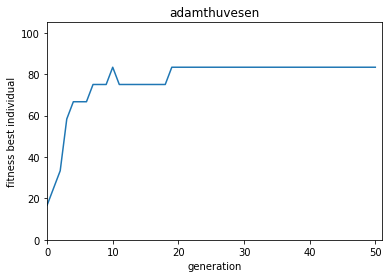

0.1789412498474121


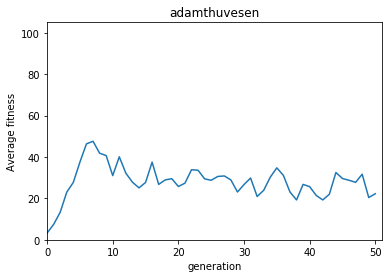

In [166]:
#variables
password = "adamthuvesen"
size_population = 100
best_sample = 10
lucky_few = 10
number_of_child = 10
number_of_generation = 50
chance_of_mutation = 5

temps1 = time.time()

if ((best_sample + lucky_few) / 2 * number_of_child != size_population):
    print ("population size not stable")
else:
    historic = multipleGeneration(number_of_generation, password, size_population, best_sample, lucky_few, number_of_child, chance_of_mutation)
    
    printSimpleResult(historic, password, number_of_generation)
    
    evolutionBestFitness(historic, password)
    evolutionAverageFitness(historic, password, size_population)

print (time.time() - temps1)

## New generation -> Evaluation of each individual -> Selection -> Reproduction -> Mutation